In [1]:
# install datasets
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [12]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load

In [4]:
# публичная ссылка на подготовленный ранее датасет, можно заменить на свою
url='https://drive.google.com/file/d/1-3MAwpJbztSND_3NbnSEW_g-XlfUDvtY/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
talks_df = pd.read_pickle(dwn_url)
talks_df.sample(10)


,Season,Episode,speaker,query,companions,close_reply,neutral_reply,bad_reply,context
35800,6,13,Sharon,"Mm, yeah baby.","[Randy, Sharon, Randy, Narrator]","[Ready., Oh, yeah. , The story begins in ages ...","[Yeeaahhh. Alright, you ready?, Alright, reme...","[Congratulations, Kyle., Huh. But... you guys...",You bet I am.. The guys at the office told me ...
18383,1,12,Singer,Ultura Lenardu Marutin!,"[Chef, Kenny, Stan, Kyle]",[(Oh no! I have got to stay away fro-aaagh!) ...,"[Look out, children!, Come on, children! , Sta...","[Tsst., I knew Kenny couldn't fit in that tea ...","Get around th' side there, Ned. I can't get a ..."
31396,5,5,Narrator,The Canadian act confused American audiences. ...,"[Phillip, Mr. Garrison, Phillip, Narrator]","[Hey, you're the guy on the screen. , What? , ...","[Excuse me, which way is the bus station? , (E...","[The flagpole! That's great! , ...O-kay., Wagh.]","Terrance was born Terrance Henry Stoot, in the..."
30627,5,2,Sheila,He's able to use comedy to overcome his handic...,"[Jimmy, Cartman, Jimmy, Timmy]","[Hehe, I don't sound like that., And how about...","[Well, I sure have met a lot of interesting pe...","[Take that you stupid Indian! , Yeah. Good job...","Don't call me an asshole, you som' bitch.. Uh,..."
36556,6,16,Butters,Poop- poop swatches?,"[Cartman, Butters, Cartman, Butters]","[Hey, that's neato, huh, Stan?, Now, personall...","[Poop comes in a lot of varieties, Butters. I ...","[Because I said so!, Okay, Mom., You are in Im...","Well I think when this is all over, our son is..."
40230,8,4,Butters,"Waaah! No! Jesus, not again!","[Skeeter, Mr. Garrison, Jimbo, Chef]","[Yeah!, All right!, All right! We did it! , Al...","[Dad!, Well, you see Butters, everything worke...","[Yeah, dude, your Uncle Jimbo sucks ass!, We-e...",Rules are you have to have five dancers. We ha...
12487,16,14,Kenny,(Red Lobster!),"[Stan, Kyle, Cartman, Kyle]","[All right, where are the missing ballots?! P...","[Oh, Red Lobster., Put down the blue orby thin...","[Dude, it's Terrance & Phillip., Mmmmm. , I'm ...",(Red Lobster!). What?. Ruh Rehh... Red. Red Lo...
23083,2,18,Agent,"Hey, it's okay! The helicopter is here! Go ge...","[Larry, Stan, Agent, Mephesto]","[Where's Gorak??, Where's the ice man?!, He ha...","[Dad!, Well, you see Butters, everything worke...","[I have to go to Platform B., Oh, dude, that i...","Huh? Whah?!. I said, stop that train!. They'r..."
7582,14,2,Kenny,"(Dude, what the fuck is so filthy or offensive...","[Cartman, Stan, Butters, Stephen]",[Why would anyone think this book so obscene o...,"[We know, we were just saying that., Dude, wha...","[You want a fight? Well, that's fine with me!,...",I know. I'm almost at the end and there's noth...
17636,1,9,Kyle,"I told you not to call my mom a bitch, Cartman!","[Cartman, Kyle, Mr. Hankey, Kyle]","[Shut up, Cartman!, Howdy-ho!, Mr. Hankey., Mo...","[O-ho. WeeeeeeeeeellllKyle's mom is a bitch, s...","[Nobody paid us anything! Now, there has been ...","Thanks to Kyle's mother.. Shut up, Cartman!. S..."


# Prepare dataset

[HuggingFace datasets library - Overview](https://colab.research.google.com/github/huggingface/datasets/blob/master/notebooks/Overview.ipynb#scrollTo=my95uHbLyjwR)

In [5]:
import datasets

In [6]:
talk_dataset ={"premise":[],
               "hypothesis" : [],
               "label": []
}

LIMIT_CONTEXT = 200

cols = ["query", "close_reply", "neutral_reply", "bad_reply", "context"]
for index, row in talks_df[cols].iterrows():

  close_reply = row["close_reply"]
  neutral_reply = row["neutral_reply"]
  bad_reply = row["bad_reply"]

  hypothesis = close_reply+neutral_reply+bad_reply
  labels = [1 for _ in range(len(close_reply))] + [0 for _ in range(len(neutral_reply))] +\
  [2 for _ in range(len(bad_reply))]

  premise = [row["query"]+"[SEP]"+row["context"][:LIMIT_CONTEXT] for _ in range(len(hypothesis))]

  if len(premise) != len(labels) != len(hypothesis):
    print(f'mistake with row {index}')
    break

  else:
    talk_dataset["premise"].extend(premise)
    talk_dataset["hypothesis"].extend(hypothesis)
    talk_dataset["label"].extend(labels)


  #print(row["query"])

In [9]:
dataset = datasets.Dataset.from_dict(talk_dataset)

print(len(dataset))
dataset[56:67]

440530


{'premise': ["Wow![SEP]Going away? For how long?. Forever.. I'm sorry boys.. Chef said he's been bored, so he joining a group called the Super Adventure Club. . Wow!",
  "Wow![SEP]Going away? For how long?. Forever.. I'm sorry boys.. Chef said he's been bored, so he joining a group called the Super Adventure Club. . Wow!",
  "Wow![SEP]Going away? For how long?. Forever.. I'm sorry boys.. Chef said he's been bored, so he joining a group called the Super Adventure Club. . Wow!",
  "Wow![SEP]Going away? For how long?. Forever.. I'm sorry boys.. Chef said he's been bored, so he joining a group called the Super Adventure Club. . Wow!",
  "Chef?? What kind of questions do you think adventuring around the world is gonna answer?![SEP]Forever.. I'm sorry boys.. Chef said he's been bored, so he joining a group called the Super Adventure Club. . Wow!. Chef?? What kind of questions do you think adventuring around the world is gonna an",
  "Chef?? What kind of questions do you think adventuring aro

## random filtered_data

Сделаем наши тренировку более детерминированной, для воспроизводимости реультатов

In [10]:
SEED = 10

random.seed(SEED)
np.random.seed(SEED)

In [13]:
filtered_data = []
for data in tqdm(dataset):
    if random.random() < 0.1:
        filtered_data.append(data)
len(filtered_data)

100%|██████████| 440530/440530 [00:13<00:00, 32195.80it/s]


43900

#  Bi-Encoder и Cross-Encoder реранкинг для Retrieval-систем

In [14]:
from typing import Callable, Iterable

import torch
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import AutoTokenizer, AutoModel
from transformers.optimization import get_linear_schedule_with_warmup
from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

## Обучим Bi-encoder

Сделаем наши тренировку более детерминированной, для воспроизводимости реультатов

### SnliDataset

In [15]:
class SnliDataset(Dataset):
    def __init__(self, premise_tokens: dict, hypothesis_tokens: dict, labels: Iterable[str]):
        self.premise_tokens = premise_tokens
        self.hypothesis_tokens = hypothesis_tokens
        self.labels = labels
        self._init_data()

    def _init_data(self) -> None:
        self.data = []
        for pt_ids, pt_am, ht_ids, ht_am, label in zip(
            self.premise_tokens["input_ids"], self.premise_tokens["attention_mask"],
            self.hypothesis_tokens["input_ids"], self.hypothesis_tokens["attention_mask"],
            self.labels
        ):
            data = {}
            data["premise_input_ids"] = torch.tensor(pt_ids, dtype=torch.long)
            data["premise_attention_mask"] = torch.tensor(pt_am, dtype=torch.long)
            data["hypothesis_input_ids"] = torch.tensor(ht_ids, dtype=torch.long)
            data["hypothesis_attention_mask"] = torch.tensor(ht_am, dtype=torch.long)
            data["label"] = torch.tensor(label, dtype=torch.long)
            self.data.append(data)

    def __getitem__(self, ix: int) -> dict[str, torch.tensor]:
        return self.data[ix]

    def __len__(self) -> int:
        return len(self.data)

In [16]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [24]:
%%time

MAX_LENGTH = 128

tokenized_premises = tokenizer([data["premise"] for data in filtered_data],
                               max_length=MAX_LENGTH, padding="max_length",
                               truncation=True, verbose=True)

tokenized_hypothesis = tokenizer([data["hypothesis"] for data in filtered_data],
                                 max_length=MAX_LENGTH, padding="max_length",
                                 truncation=True, verbose=True)

CPU times: user 19.7 s, sys: 2.04 s, total: 21.8 s
Wall time: 13.9 s


In [25]:
snli_dataset = SnliDataset(tokenized_premises,
                           tokenized_hypothesis,
                           (data["label"] for data in filtered_data))

In [26]:
train_ratio = 0.8
n_total = len(snli_dataset)
n_train = int(n_total * train_ratio)
n_val = n_total - n_train

train_dataset, val_dataset = random_split(snli_dataset, [n_train, n_val])

batch_size = 16  # mentioned in the paper
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

### Sbert



Метод mean_pool() реализует стратегию mean_pooling, как в исходной [статье](https://arxiv.org/abs/1908.10084). Реализация была взята из библиотеки sentence_transformers.

In [27]:
def mean_pool(token_embeds: torch.tensor, attention_mask: torch.tensor) -> torch.tensor:
    in_mask = attention_mask.unsqueeze(-1).expand(token_embeds.size()).float()
    pool = torch.sum(token_embeds * in_mask, 1) / torch.clamp(in_mask.sum(1), min=1e-9)
    return pool


def encode(input_texts: list[str], tokenizer: AutoTokenizer, model: AutoModel, device: str = "cpu"
) -> torch.tensor:

    model.eval()
    tokenized_texts = tokenizer(input_texts, max_length=128,
                                padding='max_length', truncation=True, return_tensors="pt")
    token_embeds = model(tokenized_texts["input_ids"].to(DEVICE),
                         tokenized_texts["attention_mask"].to(device)).last_hidden_state
    pooled_embeds = mean_pool(token_embeds, tokenized_texts["attention_mask"].to(DEVICE))
    return pooled_embeds

In [28]:
class Sbert(torch.nn.Module):
    def __init__(self, max_length: int = 128):
        super().__init__()
        self.max_length = max_length
        self.bert_model = AutoModel.from_pretrained('distilbert-base-uncased')
        self.bert_tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
        self.linear = torch.nn.Linear(self.bert_model.config.hidden_size * 3, 3)

    def forward(self, data: datasets.arrow_dataset.Dataset) -> torch.tensor:
        premise_input_ids = data["premise_input_ids"].to(DEVICE)
        premise_attention_mask = data["premise_attention_mask"].to(DEVICE)
        hypothesis_input_ids = data["hypothesis_input_ids"].to(DEVICE)
        hypothesis_attention_mask = data["hypothesis_attention_mask"].to(DEVICE)

        out_premise = self.bert_model(premise_input_ids, premise_attention_mask)
        out_hypothesis = self.bert_model(hypothesis_input_ids, hypothesis_attention_mask)
        premise_embeds = out_premise.last_hidden_state
        hypothesis_embeds = out_hypothesis.last_hidden_state

        pooled_premise_embeds = mean_pool(premise_embeds, premise_attention_mask)
        pooled_hypotheses_embeds = mean_pool(hypothesis_embeds, hypothesis_attention_mask)

        embeds =  torch.cat([pooled_premise_embeds, pooled_hypotheses_embeds,
                             torch.abs(pooled_premise_embeds - pooled_hypotheses_embeds)],
                            dim=-1)
        return self.linear(embeds)

In [29]:
dir = "/content/drive/Othercomputers/My_comp/Документы/МФТИ_Наука_о_данных/NLP_generation/DZ/DZ_1/Project/models"
PRE_TRAIN_BE_EN = True

bi_encoder = Sbert()

if PRE_TRAIN_BE_EN:
   bi_encoder.bert_model.from_pretrained(dir + "/sbert_softmax_lr_2e-6")

bi_encoder.to(DEVICE)


Sbert(
  (bert_model): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_f

# Train

In [30]:
optimizer = torch.optim.AdamW(bi_encoder.parameters(), lr=2e-6)
total_steps = len(train_dataset) // batch_size
warmup_steps = int(0.1 * total_steps)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=warmup_steps,
                                            num_training_steps=total_steps - warmup_steps)

loss_fn = torch.nn.CrossEntropyLoss()

In [32]:
def get_train_step_fn(
    model: torch.nn.Module, optimizer: torch.optim.Optimizer,
    scheduler: torch.optim.lr_scheduler.LambdaLR, loss_fn: torch.nn.CrossEntropyLoss
) -> Callable[[torch.tensor, torch.tensor], float]:

    def train_step_fn(x: torch.tensor, y: torch.tensor) -> float:
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        return loss.item()

    return train_step_fn


def get_val_step_fn(
    model: torch.nn.Module, loss_fn: torch.nn.CrossEntropyLoss
) -> Callable[[torch.tensor, torch.tensor], float]:

    def val_step_fn(x: torch.tensor, y: torch.tensor) -> float:
        model.eval()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        return loss.item()

    return val_step_fn


def mini_batch(
    dataloader: DataLoader,
    step_fn: Callable[[torch.tensor, torch.tensor], float],
    is_training: bool = True
) -> tuple[np.array, list[float]]:

    mini_batch_losses = []

    if is_training:
        print("\nTraining ...")
    else:
        print("\nValidating ...")
    n_steps = len(dataloader)
    for i, data in enumerate(dataloader):
        loss = step_fn(data, data["label"].to(DEVICE))
        mini_batch_losses.append(loss)
        if i % (batch_size * 100) == 0:
            print(f"step {i:>5}/{n_steps}, loss = {loss: .3f}")

    return np.mean(mini_batch_losses), mini_batch_losses

### Trai Val steps

In [33]:
%%time

n_epochs = 15  # mentioned in the paper

train_step_fn = get_train_step_fn(bi_encoder, optimizer, scheduler, loss_fn)
val_step_fn = get_val_step_fn(bi_encoder, loss_fn)

train_losses, train_mini_batch_losses = [], []
val_losses, val_mini_batch_losses = [], []

for epoch in range(1, n_epochs + 1):
    train_loss, _train_mini_batch_losses = mini_batch(train_dataloader, train_step_fn)
    train_mini_batch_losses += _train_mini_batch_losses
    train_losses.append(train_loss)

    with torch.no_grad():
        val_loss, _val_mini_batch_losses = mini_batch(val_dataloader, val_step_fn, is_training=False)
        val_mini_batch_losses += _val_mini_batch_losses
        val_losses.append(val_loss)


Training ...
step     0/2195, loss =  1.076
step  1600/2195, loss =  1.100

Validating ...
step     0/549, loss =  1.071

Training ...
step     0/2195, loss =  0.969
step  1600/2195, loss =  1.125

Validating ...
step     0/549, loss =  1.071

Training ...
step     0/2195, loss =  0.960
step  1600/2195, loss =  1.056

Validating ...
step     0/549, loss =  1.071

Training ...
step     0/2195, loss =  1.133
step  1600/2195, loss =  1.055

Validating ...
step     0/549, loss =  1.071

Training ...
step     0/2195, loss =  1.036
step  1600/2195, loss =  1.078

Validating ...
step     0/549, loss =  1.071

Training ...
step     0/2195, loss =  1.127
step  1600/2195, loss =  1.120

Validating ...
step     0/549, loss =  1.071

Training ...
step     0/2195, loss =  1.075
step  1600/2195, loss =  1.080

Validating ...
step     0/549, loss =  1.071

Training ...
step     0/2195, loss =  1.089
step  1600/2195, loss =  1.025

Validating ...
step     0/549, loss =  1.071

Training ...
step     0

In [34]:
last_lr = scheduler.get_lr()[0]
last_lr = round(last_lr, 5)
dir = "/content/drive/Othercomputers/My_comp/Документы/МФТИ_Наука_о_данных/NLP_generation/DZ/DZ_1/Project/models"
bi_encoder.bert_model.save_pretrained(dir + f"/sbert_softmax_lr_{last_lr}")

### Graphics

In [37]:
window_size = 32

train_mb_running_loss = []
for i in range(len(train_mini_batch_losses)-window_size):
    train_mb_running_loss.append(np.mean(train_mini_batch_losses[i:i+window_size]))

val_mb_running_loss = []
for i in range(len(val_mini_batch_losses)-window_size):
    val_mb_running_loss.append(np.mean(val_mini_batch_losses[i:i+window_size]))

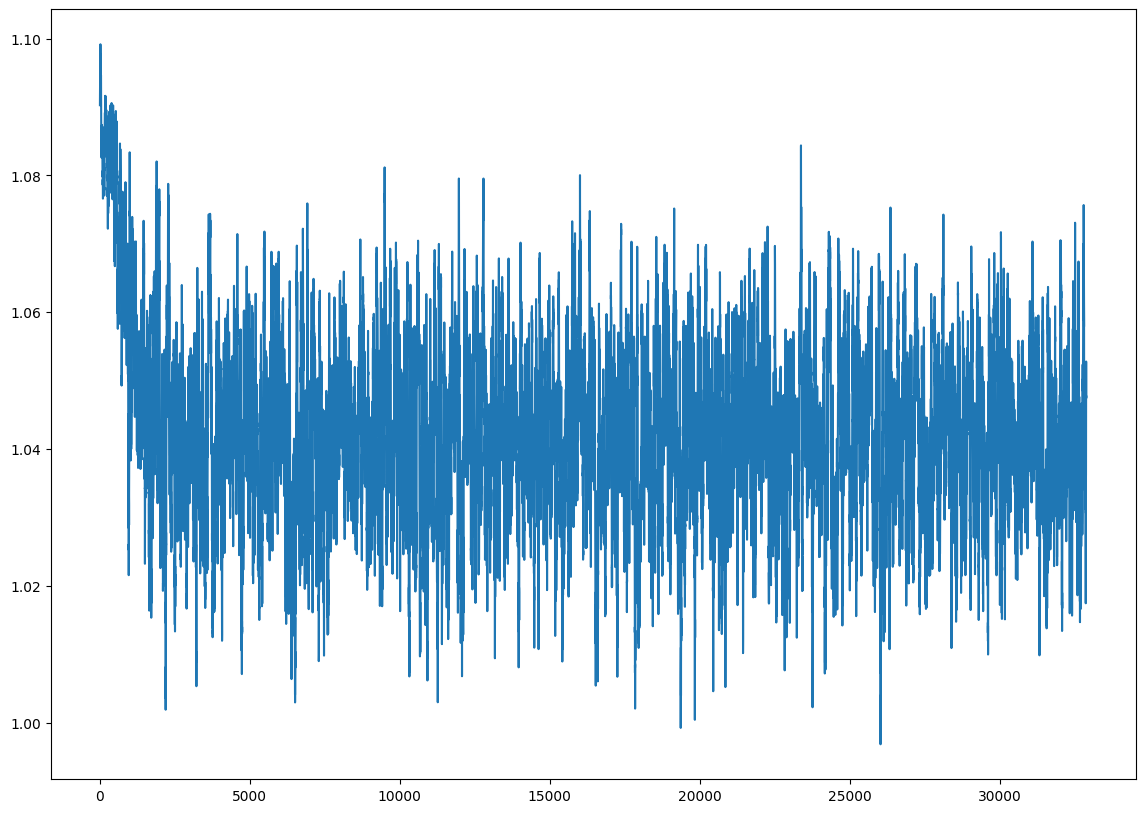

In [39]:
fix, ax = plt.subplots(figsize=(14, 10))
ax.plot(range(len(train_mb_running_loss)), train_mb_running_loss);

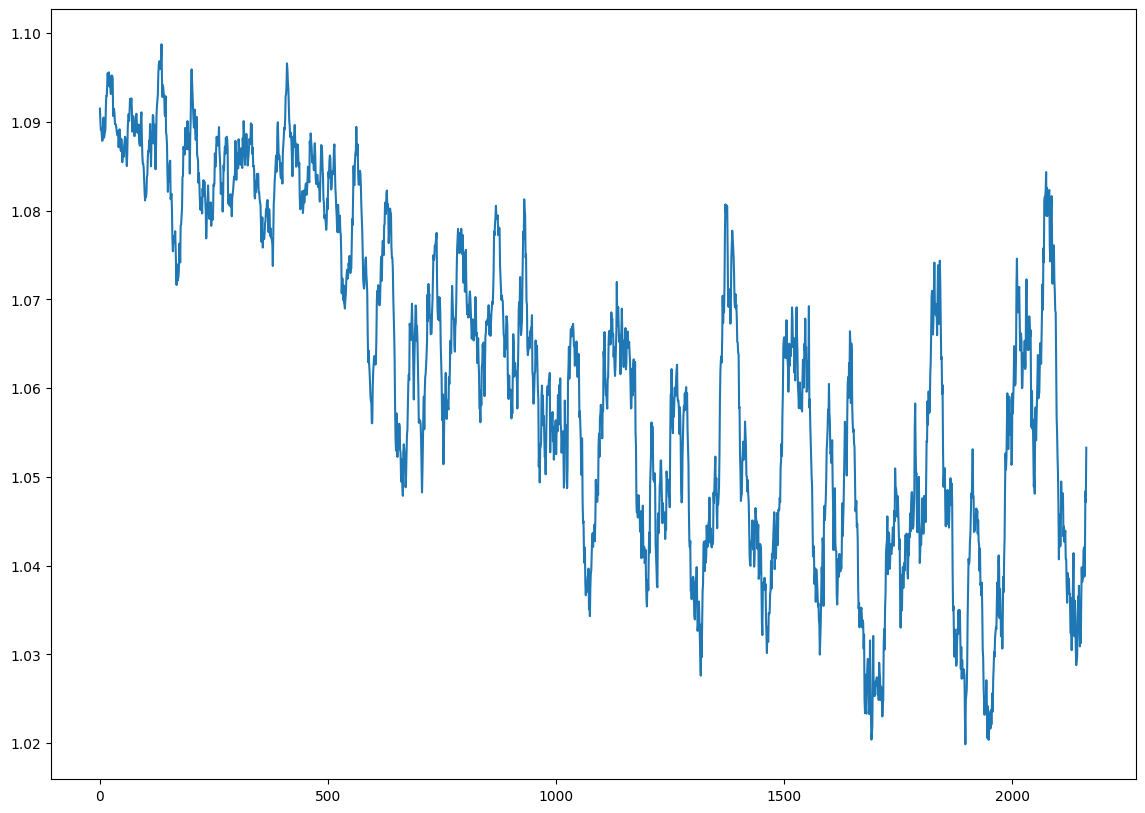

In [ ]:
# EARLY
#fix, ax = plt.subplots(figsize=(14, 10))
#ax.plot(range(len(train_mb_running_loss)), train_mb_running_loss);

### Mатрицa похожести для произвольных предложений

In [40]:
def plot_heatmap(similarity_matrix: np.array, sentences: list[str]) -> None:
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(similarity_matrix, cmap='YlGn', interpolation='nearest')

    ax.set_yticks(np.arange(len(sentences)), labels=[txt[:50] + "..." for txt in sentences])
    ax.set_xticks(np.arange(len(sentences)), labels=[txt[:50] + "..." for txt in sentences])

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    for i in range(len(sentences)):
        for j in range(len(sentences)):
            text = ax.text(j, i, round(similarity_matrix[i, j], 2),
                           ha="center", va="center", color="w")

    fig.tight_layout()
    plt.show()

Для простоты давайте попробуем взять несколько предложений, которые соответствуют трем тематическим кластерам

In [41]:
sentences = [
    "What should I do to improve my English ?",
    "What should I do to improve my spoken English?",
    "Can I improve my English?",
    "How can I earn money online?",
    "How do I earn money online?",
    "Can I earn money online?",
    "What are some mind-blowing Mobile gadgets that exist that most people don't know about?",
    "What are some mind-blowing gadgets and technologies that exist that most people don't know about?",
    "What are some mind-blowing mobile technology tools that exist that most people don't know about?"
]

In [42]:
pooled_embeds = encode(sentences, bi_encoder.bert_tokenizer, bi_encoder.bert_model, DEVICE)
pooled_embeds = pooled_embeds.cpu().detach().numpy()

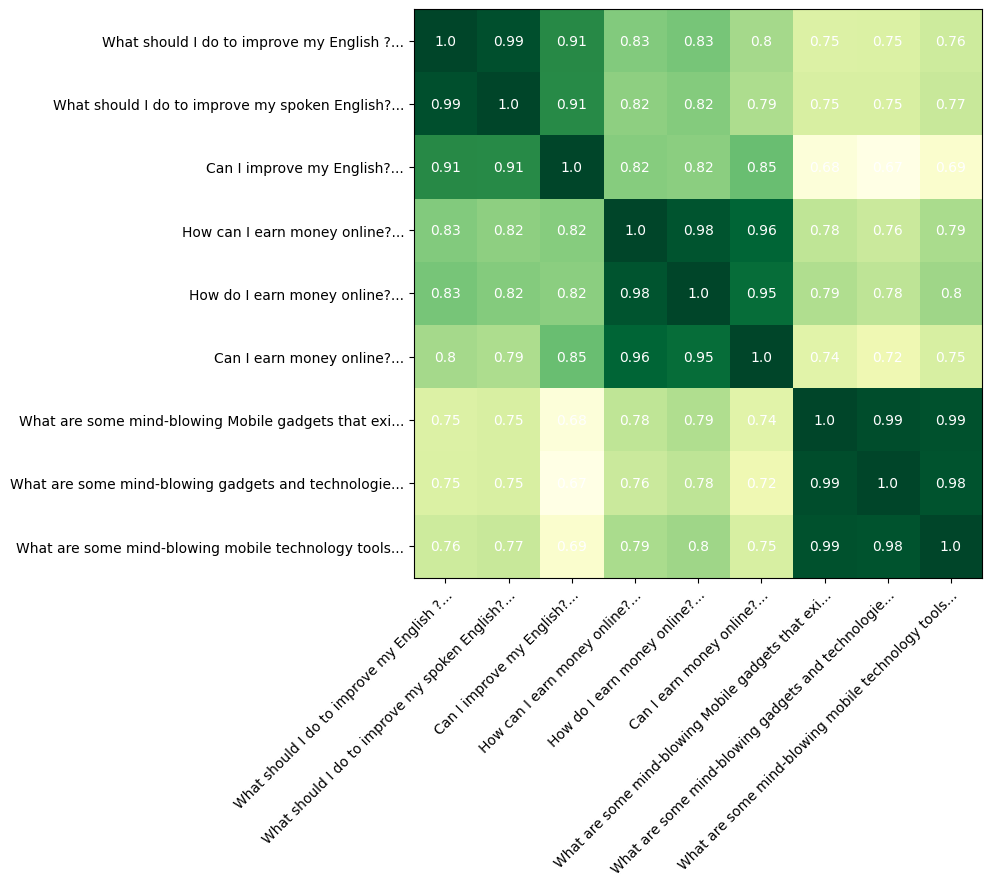

In [43]:
similarity_matrix = cosine_similarity(pooled_embeds)
plot_heatmap(similarity_matrix, sentences)

# Тест ответов

In [86]:
def flush_memory():
    import gc
    gc.collect()
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()
    with torch.no_grad():
        for _ in range(3):
          torch.cuda.empty_cache()
          torch.cuda.ipc_collect()



In [214]:
def bert_predict(question, context, corpus,
                 tokenizer, model, device,
                 size_patch = 150,
                 qty_rand_choose = 5,
                 max_out_context = 200
                 ):
    dic_answ = dict()
    dic_answ["score"] = []
    dic_answ["answer"] = []

    conext_memory= question+"[SEP]"+context

    if len(corpus) < qty_rand_choose*max_out_context:
      qty_rand_choose = int(len(corpus))
    # так как база бо
    for i in range(qty_rand_choose):
      rand_patch = list(np.random.choice(corpus, size_patch))

      pooled_embeds = encode([conext_memory] + rand_patch,
                             tokenizer,model,device)

      pooled_embeds = pooled_embeds.cpu().detach().numpy()
      cos_sim = cosine_similarity(pooled_embeds)[0][1:]
      idx = cosine_similarity(pooled_embeds)[0][1:].argmax()
      dic_answ["score"].append(cos_sim[idx])
      dic_answ["answer"].append(rand_patch[idx])

    id = np.array(dic_answ["score"]).argmax()
    answer = dic_answ["answer"][id]
    conext_memory = answer+"[SEP]"+conext_memory
    flush_memory()
    return answer, conext_memory[:max_out_context], dic_answ["score"][id]

In [ ]:
# Соберем все ответы из базы
base_answers = talks_df['close_reply'].values
all_replies = []
for rep in base_answers.tolist():
  all_replies.extend(rep)
all_replies = list(set(all_replies)) # Список всех ответов из базы

## Вопрос ответ

In [202]:
question = "What is the live?"  #
print(f"Реплика: {question}")

best_answer, conext_memory,  best_score = bert_predict(question,
                                                       "",
                                                      all_replies,
                                                      bi_encoder.bert_tokenizer,
                                                      bi_encoder.bert_model,
                                                      DEVICE
                                                      )

print(f"Лучший ответ: {best_answer}\nс вероятностью релевантности {best_score}")


Реплика: What is the live?
Лучший ответ: What contest?
с вероятностью релевантности 0.8644281625747681


In [203]:
question = "What is the live?"  #
print(f"Реплика: {question}")

best_answer, conext_memory,  best_score = bert_predict(question,
                                                       conext_memory,
                                                      all_replies,
                                                      bi_encoder.bert_tokenizer,
                                                      bi_encoder.bert_model,
                                                      DEVICE,
                                                      )

print(f"Лучший ответ: {best_answer}\nс вероятностью релевантности {best_score}")

Реплика: What is the live?
Лучший ответ: What's "The Contender"?
с вероятностью релевантности 0.8760861158370972


## Иммитация беседы с контекстом

In [213]:
rand_questions = talks_df.sample(10)['query'].values

for i, question in enumerate(rand_questions):
  print(f"Реплика: {question}")
  if not i: conext_memory = ""
  best_answer, conext_memory,  best_score = bert_predict(question,
                                                          conext_memory,
                                                          all_replies,
                                                          bi_encoder.bert_tokenizer,
                                                          bi_encoder.bert_model,
                                                          DEVICE
                                                          )
  best_score = round(float(best_score), 3)
  print(f"Ответ: {best_answer}\n score {best_score}\n")


Реплика: Hat McCollough. He was sent to prison in '82, and we believe he should be released!
Ответ: Haaha! I saw you get the picture back from Mr. Kitty, and that's why I wrote a letter to the press! To be opened in the case of my demise! Should anything happen to me, that letter will go out, and you will never find it!
 score 0.849

Реплика: Man, this stuff is strong.
Ответ: Making money off of people's handicaps! Well Token, I would like you to meet my lawyer!  As soon as he gets in here he will be handing you a cease and desist order! That show is not going to air!
 score 0.893

Реплика: That was great, Tommy. Tommy Fritz from Torrey Pines! He could be our winner.
Ответ: No! This is our home! And I'm sick of everyone who thinks they're better than me just 'cause they've got good looks, and just 'cause, even after massacring Daredevil, they happen to come back and hit a home run that everyone likes! You shouldn't be able to be good-looking and be with Jennifer Lopez and be a good dir

In [ ]:
def bert_predict(question, context, corpus,
                 tokenizer, model, device,
                 size_patch = 150,
                 qty_rand_choose = 5,
                 max_out_context = 200
                 ):
    dic_answ = dict()
    dic_answ["score"] = []
    dic_answ["answer"] = []

    conext_memory= question+"[SEP]"+context

    if len(corpus) < qty_rand_choose*max_out_context:
      qty_rand_choose = int(len(corpus))
    # так как база бо
    for i in range(qty_rand_choose):
      rand_patch = list(np.random.choice(corpus, size_patch))

      pooled_embeds = encode([conext_memory] + rand_patch,
                             tokenizer,model,device)

      pooled_embeds = pooled_embeds.cpu().detach().numpy()
      cos_sim = cosine_similarity(pooled_embeds)[0][1:]
      idx = cosine_similarity(pooled_embeds)[0][1:].argmax()
      dic_answ["score"].append(cos_sim[idx])
      dic_answ["answer"].append(rand_patch[idx])

    id = np.array(dic_answ["score"]).argmax()
    answer = dic_answ["answer"][id]
    conext_memory = answer+"[SEP]"+conext_memory
    flush_memory()
    return answer, conext_memory[:max_out_context], dic_answ["score"][id]

In [ ]:
    # Base Bert model scoring
    with torch.no_grad():
        base_bert_outputs = base_bert(**tokenized_texts)
        bert_scores = torch.sigmoid(finetuned_ce.linear(base_bert_outputs.last_hidden_state[:, 0, :]))  # Use CLS token output
